In [2]:
#!pip install git+https://github.com/vzhd1701/evernote-backup


In [3]:
import sys
sys.path.append('/Users/antonvoskobovich/IdeaProjects/TitanicSurvivals2')

import importlib

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

from tqdm import tqdm

In [6]:
!ls -l

total 480
-rw-r--r-- 1 jovyan users    346 Mar 18 09:04 Dockerfile
drwxr-xr-x 2 jovyan users     64 Mar 18 20:25 __pycache__
-rw-r--r-- 1 jovyan users  16055 Feb 20 09:38 analytics.xml
-rw-r--r-- 1 jovyan users   2496 Mar 20 06:51 config.json
-rw-r--r-- 1 jovyan users    688 Mar 18 09:21 db.py
-rw-r--r-- 1 jovyan users      0 Mar 20 06:56 en_small.db
-rw-r--r-- 1 jovyan users 218446 Jan 28 19:21 evernote2.ipynb
-rw-r--r-- 1 jovyan users 216192 Mar 19 11:13 evernote_.ipynb
-rw-r--r-- 1 jovyan users   3516 Mar 19 06:16 export.json
-rw-r--r-- 1 jovyan users   1260 Mar 20 07:07 flow.py
drwxr-xr-x 7 jovyan users    224 Mar 20 07:02 full
-rw-r--r-- 1 jovyan users   1804 Mar 19 11:13 link_corrector.py
drwxr-xr-x 5 jovyan users    160 Mar 20 06:55 md
-rw-r--r-- 1 jovyan users   2000 Mar 19 06:17 notes_service.py
drwxr-xr-x 6 jovyan users    192 Mar 20 07:00 small
-rw-r--r-- 1 jovyan users    577 Mar 19 06:21 test_notes.py
-rw-r--r-- 1 jovyan users    210 Mar 19 06:17 utils.py


In [7]:
import sqlite3
import pandas as pd



In [12]:
df = pd.read_parquet('full/raw_notes')

In [13]:
df.shape

(7747, 10)

In [14]:
df['stack'] = df['stack'].fillna(df['notebook'])

## EDA

In [15]:
df.groupby('stack')['stack'].count()

stack
Archive               1053
Areas                  717
Core                   227
Data                   303
Debug                    2
Inbox                   46
Life Mapping Stack     153
Maps                  1112
Operations             708
Personal Projects      505
Professional           489
Reflections           1817
Simple                 334
Techs                  281
Name: stack, dtype: int64

In [16]:
df.groupby('stack')['contentLength'].mean()

stack
Archive                4858.986705
Areas                  9818.479777
Core                   4779.497797
Data                  12286.920792
Debug                   169.500000
Inbox                 10525.586957
Life Mapping Stack     1730.960784
Maps                   1113.164568
Operations             2114.627119
Personal Projects     26857.203960
Professional           9470.229039
Reflections            1088.204183
Simple                 1557.673653
Techs                  9945.156584
Name: contentLength, dtype: float64

In [17]:
df.head()

,id,title,created,updated,tagNames,active,contentLength,content,notebook,stack
0,0006af78-3486-4d60-ba5e-35bbf8da65a2,"О личной эффективности программиста, или Как с...",2014-12-27 08:56:47,2015-01-12 07:31:46,[gtd],True,78848,"<?xml version=""1.0"" encoding=""UTF-8"" standalon...",Productivity,Operations
1,001b02c7-4f76-4c62-9837-1aa78e532387,Untitled Note,2019-03-07 05:25:53,2019-03-10 18:55:36,[циклы],True,393,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Dailys,Reflections
3,00520ff4-3fc7-47c9-81eb-cfb21d81f640,Alter Letter,2018-06-20 07:49:03,2018-07-10 20:31:02,None,True,2158,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Alter,Archive
5,0058e991-30ed-49b8-8f57-6fe7f81290d2,Untitled,2019-03-01 05:46:12,2019-03-01 05:57:13,None,True,988,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Dailys,Reflections
7,00240e05-7ff7-41d6-83a5-6feec798656a,Понимают ли младенцы мир с рождения?,2017-01-25 22:45:17,2017-01-25 22:45:17,[brain],True,30448,"<?xml version=""1.0"" encoding=""utf-8""?><!DOCTYP...",Two worlds,Personal Projects


In [18]:
df.query('id == "9e390b86-b145-4436-9d50-b05b372a4c4d"')

,id,title,created,updated,tagNames,active,contentLength,content,notebook,stack
5288,9e390b86-b145-4436-9d50-b05b372a4c4d,Волонтерство,2016-10-08 07:23:55,2022-01-30 15:53:49,"[Тема, Идентичность]",True,1394,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Areas,Core


In [86]:
#sns.jointplot(x=np.log1p(df['title'].str.len()),  y=np.log1p(df['contentLength']))

## Количество заметок созданных в месяц

In [127]:
df['created_month'] = df['created'].dt.to_period('M').dt.start_time
monthes_cumsum = df['created_month'].value_counts().sort_index().cumsum()
monthes_sum = df.groupby('created_month').agg(created_notes = ('id', 'count')).sort_index()

In [141]:
monthes_sum.iloc[-20:]

,created_notes
created_month,
2021-06-01,34
2021-07-01,39
2021-08-01,38
2021-09-01,39
2021-10-01,56
2021-11-01,166
2021-12-01,110
2022-01-01,107
2022-02-01,90


Text(0.5, 1.0, 'Количество заметок, созданных в месяц')

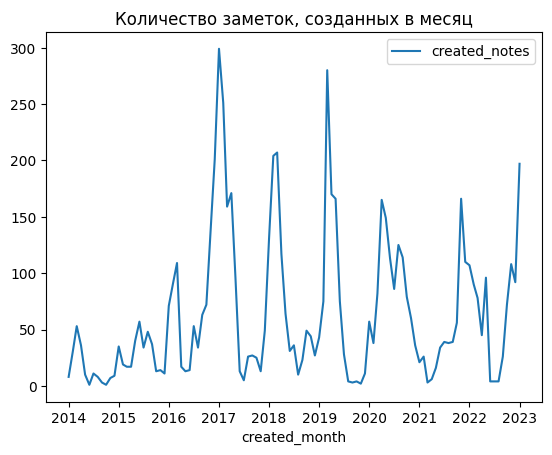

In [130]:
sns.lineplot(data=monthes_sum.query('created_month >= "2014-01-01"')).set_title('Количество заметок, созданных в месяц')

Text(0.5, 1.0, 'Количество заметок, созданных в месяц (сглажено скользящим средним)')

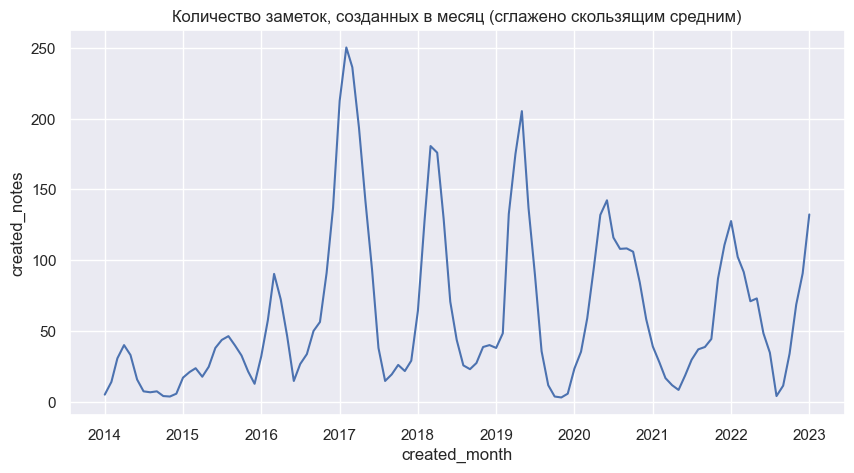

In [140]:
sns.set(rc={'figure.figsize' : (10, 5)})
( 
    sns.lineplot(data=monthes_sum.rolling(3).mean().query('created_month >= "2014-01-01"'), x='created_month', y='created_notes')
    .set_title('Количество заметок, созданных в месяц (сглажено скользящим средним)')
    
)

## Categories

In [47]:
stacks = pd.read_csv('stacks.csv')
df2 = df.merge(stacks, on='stack')

In [48]:
stacks

,stack,stack2
0,Operations,operational
1,Reflections,journals_and_publications
2,Archive,professional
3,Personal Projects,personal_projects
4,Maps,reflectional
5,Techs,professional
6,Professional,professional
7,Areas,knowledgebase
8,Simple,operational
9,Core,reflectional


In [54]:
df2['stack2'].value_counts()

stack2
professional                 1823
journals_and_publications    1817
reflectional                 1339
operational                  1042
knowledgebase                 717
personal_projects             658
data                          349
Name: count, dtype: int64

In [49]:
df2.head()

,id,title,created,updated,tagNames,active,contentLength,content,notebook,stack,stack2
0,0006af78-3486-4d60-ba5e-35bbf8da65a2,"О личной эффективности программиста, или Как с...",2014-12-27 08:56:47,2015-01-12 07:31:46,[gtd],True,78848,"<?xml version=""1.0"" encoding=""UTF-8"" standalon...",Productivity,Operations,operational
1,001b02c7-4f76-4c62-9837-1aa78e532387,Untitled Note,2019-03-07 05:25:53,2019-03-10 18:55:36,[циклы],True,393,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Dailys,Reflections,journals_and_publications
2,00520ff4-3fc7-47c9-81eb-cfb21d81f640,Alter Letter,2018-06-20 07:49:03,2018-07-10 20:31:02,None,True,2158,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Alter,Archive,professional
3,0058e991-30ed-49b8-8f57-6fe7f81290d2,Untitled,2019-03-01 05:46:12,2019-03-01 05:57:13,None,True,988,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Dailys,Reflections,journals_and_publications
4,00240e05-7ff7-41d6-83a5-6feec798656a,Понимают ли младенцы мир с рождения?,2017-01-25 22:45:17,2017-01-25 22:45:17,[brain],True,30448,"<?xml version=""1.0"" encoding=""utf-8""?><!DOCTYP...",Two worlds,Personal Projects,personal_projects


In [50]:
categories = list(set(df2.columns).difference(df.columns))

In [51]:
df2['categories_count'] = df2[categories].sum(axis=1)

In [52]:
df2.query('categories_count == 0')

,id,title,created,updated,tagNames,active,contentLength,content,notebook,stack,stack2,categories_count
5607,1cc5ec37-6cd9-4052-a663-fefda2cd5091,A,2023-02-04 20:59:20,2023-02-04 20:59:49,None,True,238,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Debug,Debug,NaN,0
5608,eac75a87-f509-4eb3-a53c-9718cc6437d9,B_new_name,2023-02-04 20:59:25,2023-02-04 20:59:47,None,True,101,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Debug,Debug,NaN,0


stack2
professional                 1823
journals_and_publications    1817
reflectional                 1339
operational                  1042
knowledgebase                 717
personal_projects             658
data                          349
Name: count, dtype: int64

In [40]:
# df_main = df2.query('~professional and ~data')
# (~df_main['operational'] == df_main['reflectional']).mean()

### Reflectional zettlekasten

In [55]:
df2.query('stack2 == "reflectional"')

,id,title,created,updated,tagNames,active,contentLength,content,notebook,stack,stack2,categories_count
5,0069b0a7-121f-4f24-b018-5678dcb6863b,Жертва,2017-05-08 18:10:37,2017-05-29 18:09:39,None,True,3041,"<?xml version=""1.0"" encoding=""UTF-8"" standalon...",Concepts,Maps,reflectional,reflectional
8,00d8eb62-b42b-4f12-89cf-b84c106e9f31,Цыгане,2018-03-12 01:21:26,2018-03-12 01:21:26,[Слова],True,144,"<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<!DO...",Concept placeholders,Maps,reflectional,reflectional
13,00ff8ee1-f6d6-4754-a54c-5efc54a38284,Вещи на производстве - 2,2017-05-21 10:17:40,2018-03-01 08:28:19,None,True,251,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Database,Maps,reflectional,reflectional
19,0132a9b7-e7d8-4f6c-a683-decc64b8ac12,Удаленная работа,2018-03-20 04:09:23,2022-03-08 05:10:13,"[инфраструктура, опора]",True,2011,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Concepts,Maps,reflectional,reflectional
23,0176043e-b0af-4cf5-a0fc-2935f1f7555f,Что такое правые и левые в политике?,2018-06-18 08:32:08,2018-06-18 08:32:17,[политика],True,132,"<?xml version=""1.0"" encoding=""UTF-8"" standalon...",Questions,Maps,reflectional,reflectional
...,...,...,...,...,...,...,...,...,...,...,...,...
7726,f9d951f0-c78b-44d9-bd3f-f6d15a8a5f53,Система долгосрочного планирования,2022-01-23 20:16:11,2024-03-17 10:50:21,"[планирование, система, инфраструктура, мечтан...",True,8828,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Areas,Core,reflectional,reflectional
7728,fa7ea6b5-dc3b-845f-f34a-0204f226050d,Кливлендский тест,2024-02-28 18:03:52,2024-03-08 12:18:12,None,True,100,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Ideas,Maps,reflectional,reflectional
7730,fb18963d-ad13-e603-d0b3-156da89247fe,Толерантность к контакту,2024-03-05 13:08:59,2024-03-06 05:20:31,[избегание],True,100,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Concepts,Maps,reflectional,reflectional
7742,fe2cbbcf-59ac-4945-ba77-7dcd930c350d,Canvas,2024-03-15 20:29:10,2024-03-16 07:01:33,None,True,468,"<!DOCTYPE en-note SYSTEM ""http://xml.evernote....",Concepts,Maps,reflectional,reflectional


In [58]:
df2[['stack2', 'stack', 'notebook']].drop_duplicates().sort_values(['stack2', 'stack', 'notebook']).iloc[20:50]

,stack2,stack,notebook
99,knowledgebase,Areas,Psychotherapy
78,knowledgebase,Areas,Relations
54,knowledgebase,Areas,Romance
199,knowledgebase,Areas,Russia
700,knowledgebase,Areas,Smena
11,knowledgebase,Areas,Sport
103,knowledgebase,Areas,Students
37,operational,Operations,Plans
0,operational,Operations,Productivity
5612,operational,Operations,Projects


## Graphs

In [117]:
from evernote_analytics import notes

In [127]:
buffer = []
for idx, x in df.query('stack == "Core" and notebook != "northcape"').iterrows():
    buffer.append(pd.DataFrame(notes.links(x['content']), columns=['type', 'to']).assign(**{'from': x['id']}))

In [133]:
pd.concat(buffer)

,type,to,from
0,В рамках,8102ea8f-3067-4e89-9781-9f6fe38492d2,0070079c-05be-43b3-a69c-b7d633d18b08
1,Parent,ad3ccc66-b8a4-40c5-9f18-3ca23c08c1b1,0070079c-05be-43b3-a69c-b7d633d18b08
2,Радости,9dda1b1f-30f1-42a8-b695-9810699fa3bf,0070079c-05be-43b3-a69c-b7d633d18b08
3,Внутренняя,4e6b1ae3-9578-4da0-b177-d99e0f257f4b,0070079c-05be-43b3-a69c-b7d633d18b08
4,Мои роли (истории),43e0224d-c5d5-479c-9f53-2ff56877e7ea,0070079c-05be-43b3-a69c-b7d633d18b08
...,...,...,...
17,Уникальные способности,3a9dc93d-5f8a-4223-a027-74e8c534af8c,fbb5c9fe-daf5-4a46-bb7f-086276f13be8
18,V,74bdbe60-0ce7-4227-b0ac-5e088f79c99d,fbb5c9fe-daf5-4a46-bb7f-086276f13be8
19,\nСейчас в сфере IT набирается всё больше и бо...,www.dotnetconf.ru,fbb5c9fe-daf5-4a46-bb7f-086276f13be8
20,\nСейчас в сфере IT набирается всё больше и бо...,suneta.ineta.ru,fbb5c9fe-daf5-4a46-bb7f-086276f13be8


In [87]:
list(links(content))

[('Обретаемая ценность', 'd0290447-ce9b-43dd-a3a6-176d0f4982ff'),
 ('Движущая сила', 'e73adeda-11ed-4937-b643-9803395cf81a'),
 ('Движущая сила', 'e1f63f9b-30c9-4841-8588-7a174c007031'),
 ('Характеристики', '8c340c88-f69a-4575-8cfb-b67e9d1c324b'),
 ('Мой фокус', 'fd011e44-a1ec-491c-b9c5-7cac775301c6'),
 ('Возможная потребность', '6d363765-6185-44a7-a566-33584537fad8'),
 ('Возможная потребность', 'f6251f8d-9340-4471-ad65-d374421ab1b5'),
 ('Возможная потребность', '59298f05-b4bf-43d4-bee7-e118ea44f03d'),
 ('Роль', 'eb322186-c6f9-42fd-a41a-80cd6f1a6b3e'),
 ('Объект исследования', 'ca7d90f3-2919-4b87-a829-65d7874b9691'),
 ('Видится как решение для', '21adf480-49fa-4910-b7e9-d0949937f636'),
 ('Внешнее проявление', 'c1f480c7-8770-4e18-9f11-660bdeba9fdf'),
 ('Не наблюдается', 'a3a5178a-6df3-4699-9089-42d5b25d3169'),
 ('Чувства и эмоции', 'c6fdcb8d-873a-48c2-9c49-b58993c424c6'),
 ('Структурность / структурирование', '526a76d2-c70a-425f-9200-ddeb72683741'),
 ('Язык', 'e1248ab5-ccbc-48d4-8488-1e4